In [ ]:
!pip install pytelegrambotapi


In [2]:
import telebot

In [3]:
API_TOKEN = ''
bot = telebot.TeleBot(API_TOKEN)

In [ ]:
!pip install pandas pandasai==0.8.4

In [5]:
import pandas as pd
from pandasai import PandasAI

In [6]:
from pandasai.llm.starcoder import Starcoder

In [7]:
llm = Starcoder(api_token="")

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/acorreac/bertoti/main/CIL/cinquenta-musicas.csv")

In [9]:
df.head()

,position,song,streams,artist,year
0,1,Blinding Lights,3.834,The Weeknd,1905
1,2,Shape of You,3.649,Ed Sheeran,1905
2,3,Someone You Loved,3.004,Lewis Capaldi,1905
3,4,Sunflower,2.949,Post Malone e Swae Lee,1905
4,5,Dance Monkey,2.914,Tones and I,1905


In [10]:
pandas_ai = PandasAI(llm, conversational=False)

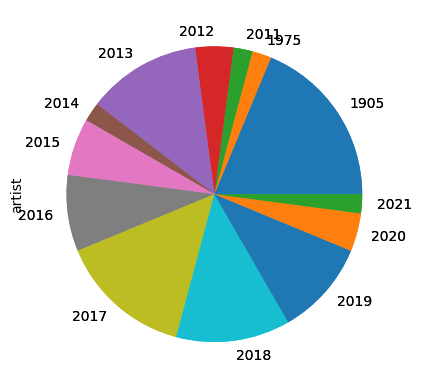

In [ ]:
res = pandas_ai.run(df, prompt='plot a pie chart with artists by year?')

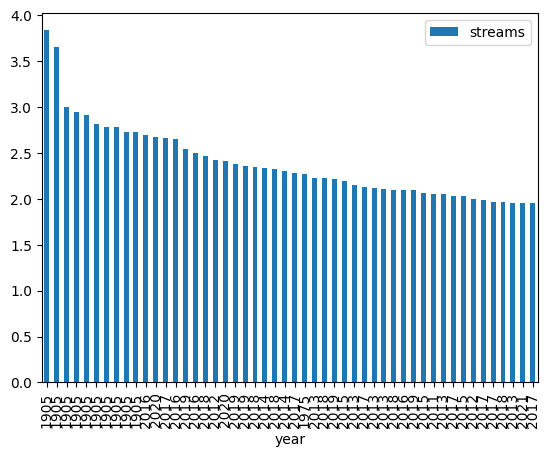

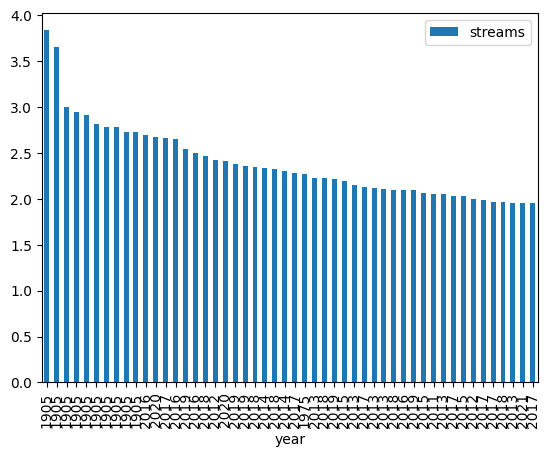

In [ ]:
res = pandas_ai.run(df, prompt='plot a chart with the number of streams per year?')

In [16]:
res = pandas_ai.run(df, prompt='print the csv')

In [17]:
res

,position,song,streams,artist,year
0,1,Blinding Lights,3.834,The Weeknd,1905
1,2,Shape of You,3.649,Ed Sheeran,1905
2,3,Someone You Loved,3.004,Lewis Capaldi,1905
3,4,Sunflower,2.949,Post Malone e Swae Lee,1905
4,5,Dance Monkey,2.914,Tones and I,1905
5,6,One Dance,2.810,Drake feat. Wizkid e Kyla,1905
6,7,Rockstar,2.786,Post Malone feat. 21 Savage,1905
7,8,Stay,2.780,The Kid Laroi e Justin Bieber,1905
8,9,Starboy,2.728,The Weeknd,1905
9,10,As It Was,2.723,Harry Styles,1905


In [ ]:
res = pandas_ai.run(df, prompt='Which song is in first position?')

In [ ]:
res

In [19]:
res = pandas_ai.run(df, prompt='Which songs are from 2019?')

In [20]:
res

,position,song,streams,artist,year
14,15,Señorita,2.546,Shawn Mendes e Camila Cabello,2019
19,20,Don't Start Now,2.376,Dua Lipa,2019
20,21,Bad Guy,2.362,Billie Eilish,2019
29,30,Circles,2.219,Post Malone,2019
37,38,7 Rings,2.093,Ariana Grande,2019


In [ ]:
#######################################################################################################

In [21]:

@bot.message_handler(func=lambda message: True)
def response(message):

  response = pandas_ai.run(df, prompt=message.text)


  bot.reply_to(message, response['song'].to_string(index=False))

In [23]:
bot.polling()